# Linear Regression

**Linear Regression** is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). It assumes a linear relationship, expressed as:  

**Y = wX + b**  

- **Y**: Dependent variable (output).  
- **X**: Independent variable(s) (input).  
- **w**: Weight(s) or coefficient(s) determining the impact of each input.  
- **b**: Bias or intercept.  

### When is it used?  
- To predict a continuous value (e.g., house prices, stock prices).  
- To understand relationships between variables.  
- To identify trends or make forecasts when the relationship between input and output is approximately linear.  


In [3]:
# Y = mX + c
# Multiple Linear Regression
# Y = m1X1 + m2X2 + m3X3 + ... + c

# Advantages:
# 1. More accurate
# 2. Captures more information
# 3. Relationship between dependent and independent variables

# Disadvantages:
# 1. Overfitting
# 2. More complex
# 3. More time consuming
# 4. More data required
# 5. More assumptions


In [4]:
# Loss Function
# Measure how far the predicted value is from the actual value
# Mean Squared Error (MSE) = 1/n * Σ(yi - ŷi)^2
# yi = actual value
# ŷi = predicted value
# n = number of observations

# Lower the value of Loss Function, Higher the accuracy of the model

In [5]:
# Gradient Descent
# Optimization algorithm to minimize the loss function
# Find the optimal values of the coefficients (m1, m2, m3, ..., c)
# Start with random values of the coefficients
# Update the values of the coefficients to minimize the loss function
# Repeat until the optimal values of the coefficients are
# found which minimize the loss function

In [6]:
# Y = wX + b
# Y --> Dependent Variable
# X --> Independent Variable
# w --> Weight
# b --> Bias

In [7]:
# Importing numpy library
import numpy as np


In [8]:
# importing numpy library
import numpy as np

class Linear_Regression():

    # initiating the parameters (learning rate & no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # number of training examples & number of features
        self.m, self.n = X.shape  # number of rows & columns

        # initiating the weight and bias 
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent
        for _ in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
# Datapreprocessing
# Importing the dataset
salary_data = pd.read_csv('salary_data.csv')

In [11]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [13]:
# Number of Rows and Colums
salary_data.shape

(30, 2)

In [14]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
# Splitting the Feature and Target
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [16]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [18]:
# Sploitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [19]:
# Training the Linear Regression model
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [20]:
model.fit(X_train, Y_train)

In [21]:
# Printing the parameters values
print("Weight : ", model.w[0])
print("Bias : ", model.b)

Weight :  9580.301196603597
Bias :  23226.38946603212


In [22]:
# Predict the salary value for the test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


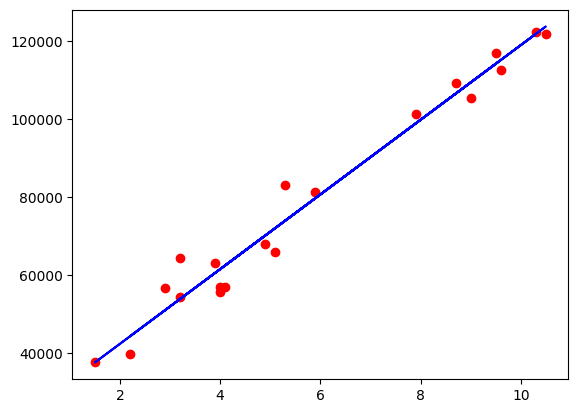

In [23]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')

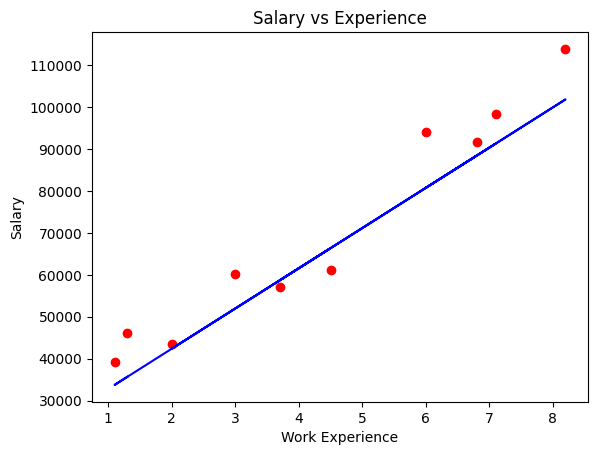

In [24]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.show()

# Logistic Regression  
**Logistic Regression** is a statistical method used for classification tasks. It predicts the probability of an outcome belonging to one of two classes using the **sigmoid function**, which maps values to a range between 0 and 1. The model is expressed as:  

**P(Y=1 | X) = 1 / (1 + e^-(wX + b))**  

- **P(Y=1 | X)**: Probability of the outcome being in class 1.  
- **wX + b**: Linear combination of input features.  

### When is it used?  
- To classify binary outcomes (e.g., spam vs. not spam, disease vs. no disease).  
- In scenarios where the output is categorical but probabilities are useful for decision-making.  
- Extensions like multinomial and ordinal logistic regression are used for multi-class or ranked data classification.  

In [25]:
# Logistic Regression
# 1. Supervised Learning Algorithm
# 2. Classification Model
# 3. Best For Binary Classification Problem
# 4. Sigmoid Function


In [26]:
# r^ = 1 / (1 + e^-Z), Z = wX + b

In [27]:
# Advantages:
# 1. Simple
# 2. Fast
# 3. Efficient
# 4. Less Complexity
# 5. Good Accuracy
# Disadvantages:
# 1. Not Suitable for Complex Problems
# 2. Not Suitable for Multiclass Classification
# 3. High Bias
# 4. Overfitting
# 5. Feature Engineering

In [28]:
# Loss Function
# Measure how far the predicted value is from the actual value
# Binary Cross Entropy Loss = - (y * log(ŷ) + (1 - y) * log(1 - ŷ))
# yi = actual value
# ŷi = predicted value
# n = number of observations

In [29]:
# import dependencies
import numpy as np


In [30]:
# Logistic Regression  
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)
    
    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [33]:
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
diabetes_dataset.shape


(768, 9)

In [35]:
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
diabetes_dataset['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [37]:
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [38]:

# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [39]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [40]:
print(target)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(features)


StandardScaler()

In [43]:
standardized_data = scaler.transform(features)


In [44]:
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [45]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [46]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [48]:
print(features.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [49]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [50]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

In [51]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
     

In [52]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7768729641693811


In [53]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [54]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7662337662337663


In [55]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Users\Pranav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Support Vector Machine 

**Support Vector Machine (SVM)** is a supervised machine learning algorithm used for classification and regression tasks. It aims to find the optimal hyperplane that separates data points of different classes with the maximum margin. Key concepts include:  

- **Support Vectors**: Data points closest to the hyperplane, influencing its position.  
- **Kernel Trick**: Allows SVM to handle non-linear relationships by mapping data into higher-dimensional spaces.  

### When is it used?  
- For binary or multi-class classification tasks (e.g., text classification, image recognition).  
- When the dataset has a clear margin of separation between classes.  
- Works well with small to medium-sized datasets and when computational efficiency is important.  

In [56]:
# Hyperplane - is a line that splits the input feature space into two parts where each class is on either side of the hyperplane
# Support Vectors - are the data points that are closest to the hyperplane and influence the position and orientation of the hyperplane
# Margin - is the distance between the hyperplane and the nearest data point from either set

# Advantages:
# 1. High Accuracy
# 2. Works well on smaller cleaner datasets
# 3. Effective in high dimensional spaces
# 4. Memory Efficient

# Disadvantages:
# 1. Not suitable for large datasets
# 2. Not suitable for noisier datasets


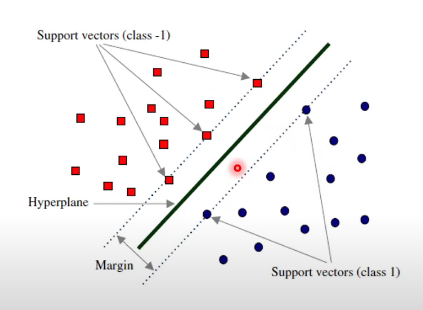

In [57]:
# SVM classifier
# for all points which lie to the left side of the hyperplane, the value of WtX will be Poisitve
# for all points which lie to the right side of the hyperplane, the value of WtX will be Negative
# if label pass through origin then WtX = 0
# if label does not pass through origin then WtX + b = 0
# Margin space should be maximum

In [58]:
# Optmizing SVM
# Margin Formula x1-x2 = 2/||W||
# max(2/||W||)
# or min(||W||/2)

In [59]:
# SVM Kernel
# 1. Linear Kernel - K(X1, X2) = X1T * X2
# 2. Polynomial Kernel - K(X1, X2) = (X1T * X2 + r)^d
# 3. Radial Basis Function (RBF) Kernel - K(X1, X2) = exp(-gamma * ||X1 - X2||^2)
# 4. Sigmoid Kernel - K(X1, X2) = tanh(α * X1T * X2 + c)

In [60]:
# Hard Margin SVM
# 1. No misclassification allowed
# 2. Not suitable for noisy data
# 3. Not suitable for non-linear data
# soft Margin SVM
# 1. Misclassification allowed
# 2. Suitable for noisy data
# 3. Suitable for non-linear data


In [61]:
# Hinge Loss is used in place of Loss Function in SVM
# maximun margin is the objective of SVM
# Loss = max(0, 1 - Y * (Wt * X + b))
# 0 - for correct classification
# 1 - for wrong classification

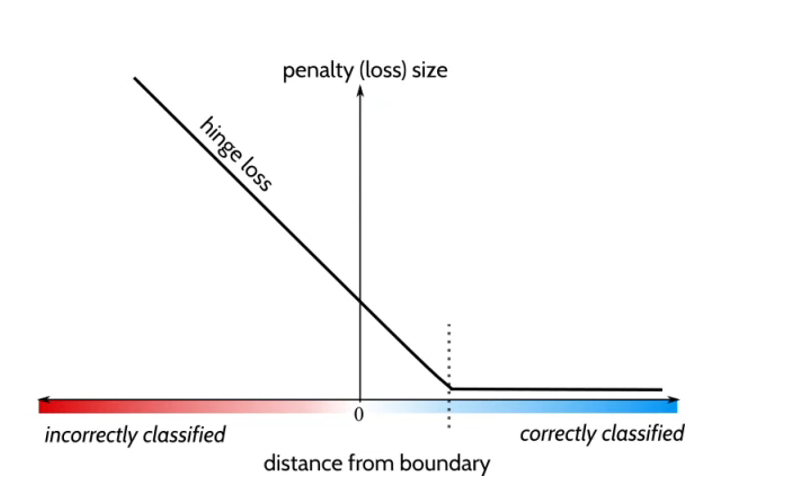

In [62]:
# Gradient Descent
# It is a optimization algorithm to minimize the loss function
# W = w - Learning Rate * dL/dw
# b = b - Learning Rate * dL/db

In [63]:
# importing numpy library
import numpy as np

In [64]:
# Support Vector Machine Classifier

class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat



In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
# loading the data from csv file to pandas dataframe
diabetes_data = pd.read_csv('diabetes.csv')

In [67]:
# print the first 5 rows of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
# number of rows and columns in the dataset
diabetes_data.shape

(768, 9)

In [69]:
# getting the statistical measures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
diabetes_data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [71]:
# 0 --> Non-diabetic

# 1 --> Diabetic

In [72]:
# separating the features and target

features = diabetes_data.drop(columns='Outcome', axis=1)

target = diabetes_data['Outcome']

In [73]:
print(features)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [74]:
print(target)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [75]:
# Data Standardization

scaler = StandardScaler()


In [76]:
scaler.fit(features)


StandardScaler()

In [77]:
StandardScaler(copy=True, with_mean=True, with_std=True)


StandardScaler()

In [78]:
standardized_data = scaler.transform(features)


In [79]:
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [80]:

features = standardized_data
target = diabetes_data['Outcome']

In [81]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [82]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=2)

In [83]:
print(features.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [84]:
# Training the Model

# Support Vector Machine Classifier

classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)


In [85]:


# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

In [86]:
# Accuracy Score


# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [87]:
print('Accuracy score on training data = ', training_data_accuracy)


Accuracy score on training data =  0.7866449511400652


In [88]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [89]:
print('Accuracy score on test data = ', test_data_accuracy)


Accuracy score on test data =  0.7727272727272727


In [90]:

input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')

else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


c:\Users\Pranav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Lasso Regression

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes **L1 regularization**. It adds a penalty proportional to the absolute value of the coefficients to the loss function, which helps in:  

1. Shrinking less important feature coefficients toward zero.  
2. Performing feature selection by effectively eliminating irrelevant features.  

The loss function is:  
**Loss = RSS + λ * Σ|w|**,  
where **RSS** is the residual sum of squares, and **λ** is the regularization parameter.

### When is it used?  
- When there are many features, and some may be irrelevant or redundant.  
- To prevent overfitting by adding regularization.  
- For feature selection and building simpler, interpretable models.  
- Works well in high-dimensional datasets (e.g., genetics, text data).  

In [91]:
import numpy as np

# Creating a class for Lasso Regression
class Lasso_Regression:

    # Initializing the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        """
        learning_rate: Step size for gradient descent.
        no_of_iterations: Number of iterations for training the model.
        lambda_parameter: Regularization parameter for Lasso regression.
        """
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    # Fitting the dataset to the Lasso Regression model
    def fit(self, X, Y):
        """
        X: Input features (Independent variables).
        Y: Target variable (Dependent variable).
        """
        # m --> Number of data points (rows)
        # n --> Number of input features (columns)
        self.m, self.n = X.shape

        # Initializing weights and bias to zero
        self.w = np.zeros(self.n)
        self.b = 0

        # Storing input and output values for use in other methods
        self.X = X
        self.Y = Y

        # Implementing Gradient Descent algorithm for optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    # Function for updating the weights & bias value
    def update_weights(self):
        """
        Updates the weights and bias using the gradients.
        """
        # Predicting the target variable using the current weights and bias
        Y_prediction = self.predict(self.X)

        # Gradients (dw, db)

        # Gradient for weights (dw)
        dw = np.zeros(self.n)

        for i in range(self.n):
            # Adding L1 regularization term based on the sign of the weight
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

        # Gradient for bias (db)
        db = -2 * np.sum(self.Y - Y_prediction) / self.m

        # Updating the weights and bias using the gradients
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Predicting the target variable
    def predict(self, X):
        """
        X: Input features.
        Returns: Predicted target values based on the linear equation Y = wX + b.
        """
        return X.dot(self.w) + self.b

# Example usage of the Lasso Regression class
if __name__ == "__main__":
    # Generating a small dataset for testing
    X = np.array([[1, 2], [2, 3], [4, 5], [3, 6]])  # Independent variables
    Y = np.array([5, 7, 11, 13])  # Dependent variable

    # Hyperparameters
    learning_rate = 0.01
    no_of_iterations = 1000
    lambda_parameter = 0.1

    # Creating an instance of the Lasso Regression model
    model = Lasso_Regression(learning_rate, no_of_iterations, lambda_parameter)

    # Training the model
    model.fit(X, Y)

    # Making predictions
    predictions = model.predict(X)

    # Displaying the predictions
    print("Predicted values:", predictions)
    print("Weights:", model.w)
    print("Bias:", model.b)


Predicted values: [ 4.98698921  6.99079715 10.99841304 13.00203995]
Weights: [9.05149234e-05 2.00371743e+00]
Bias: 0.979463833390765
